In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 1) In order to determine which group to target one basic question to ask would be how many transactions are for customer against subscriber. The table definition for subscriber_type column is: Subscriber = annual or 30-day member; Customer = 24-hour or 3-day member

In [2]:
!bq query --use_legacy_sql=false 'SELECT count(*), subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` group by subscriber_type'

Waiting on bqjob_r49a9e28dee09c680_00000168d03a13e7_1 ... (0s) Current status: DONE   
+--------+-----------------+
|  f0_   | subscriber_type |
+--------+-----------------+
| 136809 | Customer        |
| 846839 | Subscriber      |
+--------+-----------------+


As seen from the above result there are a higher number of transactions for Subscriber which means more people are buying annual or 30-day membership.

#### 2) Another interesting data point in determining if people are actually riding for a duration of over 24 hours. The column duration_sec provides Time of trip in seconds The query would compare total counts in the trip table against count of transactions having duration_sec greater than 246060 (24 hours * 60 minutes * 60 seconds).

In [3]:
!bq query --use_legacy_sql=false --format=csv 'SELECT "Total counts" valuefield, count(trip_id) counttrip FROM `bigquery-public-data.san_francisco.bikeshare_trips` a union all SELECT "Over a day count" valuefield, count(trip_id) counttrips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec > 86400' > commuter_result.csv

Waiting on bqjob_r18cf579a952c7a7a_00000168d03a24eb_1 ... (0s) Current status: DONE   

In [4]:
!bq query --use_legacy_sql=false --format=csv 'SELECT "Total counts" valuefield, count(trip_id) counttrip FROM `bigquery-public-data.san_francisco.bikeshare_trips` a union all SELECT "Over a day count" valuefield, count(trip_id) counttrips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec > 86400 union all SELECT "Less than a day count" valuefield, count(trip_id) counttrips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec <= 86400 union all SELECT "Less than a day and over 30 mins count" valuefield, count(trip_id) counttrips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec <= 86400 and duration_sec > 1800 union all SELECT "Of half an hr or less count" valuefield, count(trip_id) counttrips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec <= 1800 ' > commuter_result.csv

Waiting on bqjob_r2998aa83e70d0318_00000168d03a3040_1 ... (0s) Current status: DONE   

In [5]:
commuter_trips = pd.read_csv('commuter_result.csv')
commuter_trips

,valuefield,counttrip
0,Total counts,983648
1,Over a day count,296
2,Of half an hr or less count,936311
3,Less than a day and over 30 mins count,47041
4,Less than a day count,983352


Text(0.5,0,'Trip Counts')

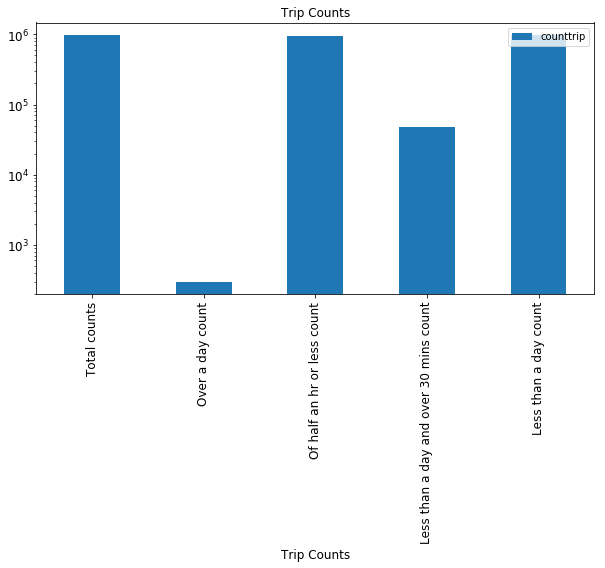

In [6]:
commuter_trips.index = list(commuter_trips.valuefield)

ax = commuter_trips.plot(kind='bar', title ="Trip Counts", figsize=(10, 5), legend=True, fontsize=12, logy=True)
ax.set_xlabel("Trip Counts", fontsize=12)

As can be seen from the results trips going over a 24 hour period are a very small fraction of the total trips in the table.

#### 3) What are the 25 most popular start and end stations for the Customer subscriber type. And what kind of foot-fall do these stations see - that is what are the total trips for these trips (for 2016). We are making an assumption that the data where start_date and end_date are on different dates are due to data corruption. Hence we will filter out these kind of records.

In [7]:
!bq query --use_legacy_sql=false --format=csv 'SELECT count(trip_id) counttrip, max(duration_sec) max_duration_sec, start_station_name, end_station_name FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Customer" and EXTRACT(YEAR from start_date) = 2016 and DATE(start_date) = DATE(end_date) group by start_station_name, end_station_name order by count(trip_id) desc limit 25'  > highest_tread_result.csv

Waiting on bqjob_r5390ffc080f188f6_00000168d03a3db1_1 ... (0s) Current status: DONE   

In [8]:
pop_trips = pd.read_csv('highest_tread_result.csv')
pop_trips

,counttrip,max_duration_sec,start_station_name,end_station_name
0,704,28026,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome
1,475,29484,Embarcadero at Sansome,Embarcadero at Sansome
2,366,25977,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building)
3,286,14749,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building)
4,230,22652,Embarcadero at Vallejo,Embarcadero at Sansome
5,187,44969,University and Emerson,University and Emerson
6,161,19193,Harry Bridges Plaza (Ferry Building),Embarcadero at Vallejo
7,150,14953,Steuart at Market,Embarcadero at Sansome
8,138,63502,Market at 4th,Embarcadero at Sansome
9,138,39931,Powell at Post (Union Square),Powell at Post (Union Square)


Text(0.5,0,'start_station_name')

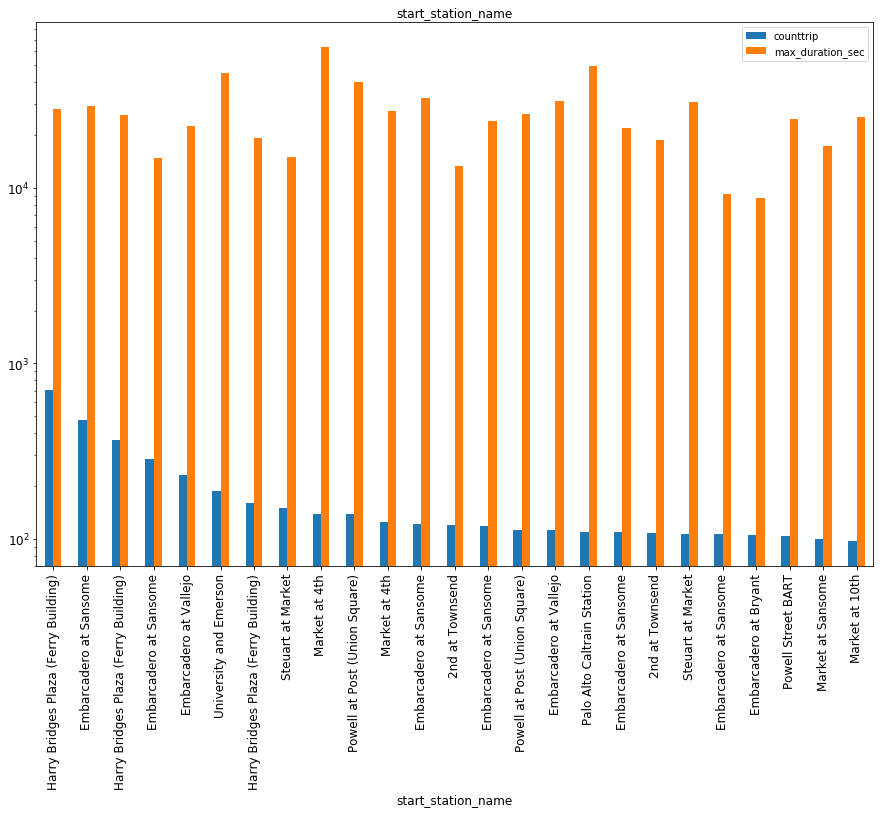

In [9]:
ax = pop_trips.start_station_name
pop_trips.index = list(pop_trips.start_station_name)

ax = pop_trips.plot(kind='bar', title ="start_station_name", figsize=(15, 10), legend=True, fontsize=12, logy=True)
ax.set_xlabel("start_station_name", fontsize=12)

Text(0.5,0,'end_station_name')

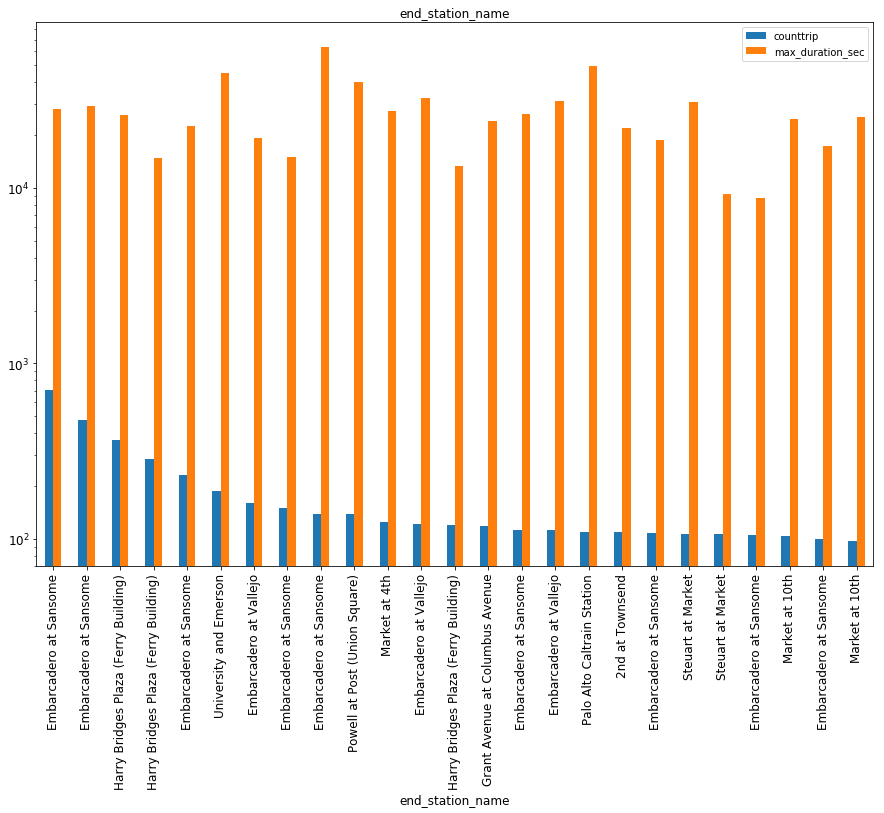

In [10]:
ax = pop_trips.end_station_name
pop_trips.index = list(pop_trips.end_station_name)

ax = pop_trips.plot(kind='bar', title ="end_station_name", figsize=(15, 10), legend=True, fontsize=12, logy=True)
ax.set_xlabel("end_station_name", fontsize=12)

#### 4) What are the 25 most popular start and end stations for the Subscriber subscriber type. And what kind of foot-fall do these stations see - that is what are the total trips for these trips (for 2016). We are making an assumption that the data where start_date and end_date are on different dates are due to data corruption. Hence we will filter out these kind of records.

In [11]:
!bq query --use_legacy_sql=false --format=csv 'SELECT count(trip_id) counttrip, max(duration_sec) max_duration_sec, start_station_name, end_station_name FROM `bigquery-public-data.san_francisco.bikeshare_trips` where subscriber_type = "Subscriber" and EXTRACT(YEAR from start_date) = 2016 and DATE(start_date) = DATE(end_date) group by start_station_name, end_station_name order by count(trip_id) desc limit 25'  > highest_tread_result.csv

Waiting on bqjob_r1a7bc4d752d3aec8_00000168d03a4f25_1 ... (0s) Current status: DONE   

In [12]:
pop_trips = pd.read_csv('highest_tread_result.csv')
pop_trips

,counttrip,max_duration_sec,start_station_name,end_station_name
0,2166,3154,Market at 10th,San Francisco Caltrain 2 (330 Townsend)
1,2010,2708,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend)
2,1762,10409,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building)
3,1743,1456,2nd at Townsend,Harry Bridges Plaza (Ferry Building)
4,1651,2651,Harry Bridges Plaza (Ferry Building),2nd at Townsend
5,1617,3289,Embarcadero at Sansome,Steuart at Market
6,1584,2610,Steuart at Market,San Francisco Caltrain (Townsend at 4th)
7,1534,5238,Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th)
8,1497,1782,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th)
9,1436,30361,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th)


Text(0.5,0,'start_station_name')

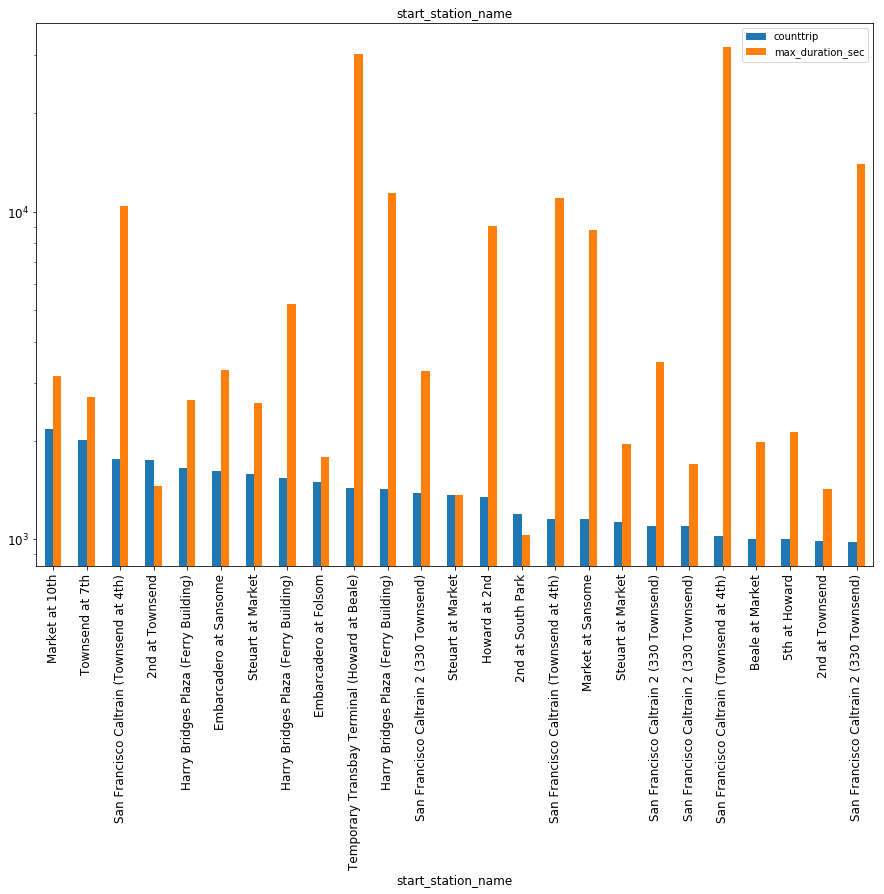

In [13]:
ax = pop_trips.start_station_name
pop_trips.index = list(pop_trips.start_station_name)

ax = pop_trips.plot(kind='bar', title ="start_station_name", figsize=(15, 10), legend=True, fontsize=12, logy=True)
ax.set_xlabel("start_station_name", fontsize=12)

Text(0.5,0,'end_station_name')

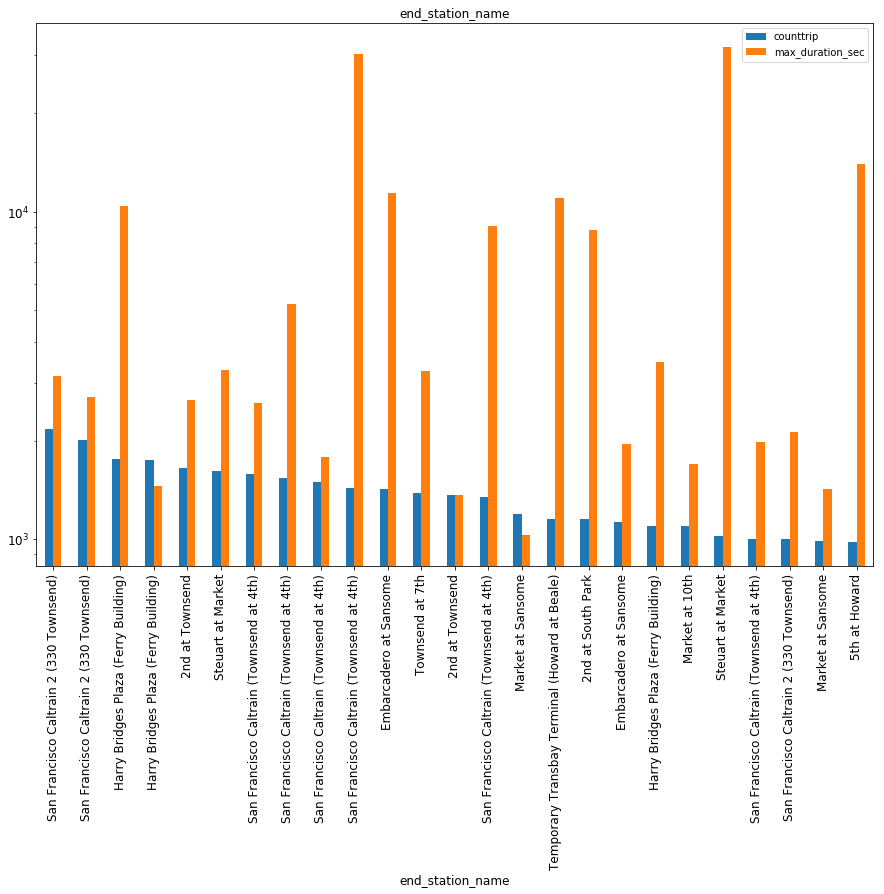

In [14]:
ax = pop_trips.end_station_name
pop_trips.index = list(pop_trips.end_station_name)

ax = pop_trips.plot(kind='bar', title ="end_station_name", figsize=(15, 10), legend=True, fontsize=12, logy=True)
ax.set_xlabel("end_station_name", fontsize=12)

#### 5) Let us now find out the number of bikes available at stations for the 25 highest counts - this will help us understand which stations have underutilized bikes and would benefit from some kind of deals. We will only consider the 2016 data.

In [ ]:
!bq query --use_legacy_sql=false --format=csv 'SELECT count(bikes_available) as bikes_available, name, DATE(time) as date FROM `bigquery-public-data.san_francisco.bikeshare_status` status join `bigquery-public-data.san_francisco.bikeshare_stations` stations on (status.station_id = stations.station_id) where EXTRACT(YEAR from time) = 2016 group by name, date order by date, count(*) desc limit 25' > ava_bikes.csv

Waiting on bqjob_r65d1ca9b3a3acf44_00000168d03a604d_1 ... (0s) Current status: DONE   

In [ ]:
ava_bikes_df = pd.read_csv('ava_bikes.csv')
ava_bikes_df

In [ ]:
ava_bikes_df.bikes_available.hist()

#### 6) Lets now find out if there bikes available at the highest travelled stations: Harry Bridges Plaza (Ferry Building) and Embarcadero at Sansome. We will only consider the 2016 data.

In [ ]:
!bq query --use_legacy_sql=false 'SELECT count(bikes_available) bikes_available, name, DATE(time) date FROM `bigquery-public-data.san_francisco.bikeshare_status` status join `bigquery-public-data.san_francisco.bikeshare_stations` stations on (status.station_id = stations.station_id) where EXTRACT(YEAR from time) = 2016 and status.station_id in (50,60) group by name, date order by date, count(*) desc limit 15'

Number of bikes available surprisingly seems similar (station ids are 50 and 60): 60	Embarcadero at Sansome 50	Harry Bridges Plaza (Ferry Building) Could a possible solution then be to reduce the number of bikes in less used stations?

#### 7)  Let us check the number of bikes used

In [ ]:
!bq query --use_legacy_sql=false --format=csv 'SELECT name, count(bike_number) bikes_used, DATE(start_date) as date FROM `bigquery-public-data.san_francisco.bikeshare_trips`  trips join `bigquery-public-data.san_francisco.bikeshare_stations` stations on (trips.start_station_id = stations.station_id) WHERE EXTRACT(YEAR from start_date) = 2016 group by name, date order by bikes_used desc limit 25' > bikes_used.csv

In [ ]:
bikes_used = pd.read_csv('bikes_used.csv')
bikes_used = bikes_used.sort_values(by = ['name'], ascending = False)
bikes_used

In [ ]:
ax = bikes_used.name
bikes_used.index = list(bikes_used.name)

ax = bikes_used.plot(kind='bar', title ="start_station_name", figsize=(15, 10), legend=True, fontsize=12, logy=True)
ax.set_xlabel("start_station_name", fontsize=12)

#### 8)  Let us check the stations which have low number of bikes used

In [ ]:
!bq query --use_legacy_sql=false --format=csv 'SELECT name, count(bike_number) bikes_used, DATE(start_date) as date FROM `bigquery-public-data.san_francisco.bikeshare_trips`  trips join `bigquery-public-data.san_francisco.bikeshare_stations` stations on (trips.start_station_id = stations.station_id) WHERE EXTRACT(YEAR from start_date) = 2016 group by name, date order by bikes_used asc limit 25' > bikes_less_used.csv

In [ ]:
bikes_less_used = pd.read_csv('bikes_less_used.csv')
bikes_less_used = bikes_less_used.sort_values(by = ['name'], ascending = False)
bikes_less_used

In [ ]:
ax = bikes_less_used.name
bikes_less_used.index = list(bikes_less_used.name)

ax = bikes_less_used.plot(kind='bar', title ="start_station_name", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("start_station_name", fontsize=12)

## Analysis: Findings and Recommendations

The data created above shows that the commuter type: Subscriber has about 6 times as many as many customers as shown in cell 2. <br><br>

It can also be seen that the maximum number of trips are 30 minutes or less in duration. <br>
Hence offer on 30 minutes or less trips would see maximum utilization. <br><br>

The data from cells 38, 39 and 76 show that we only need to consider trips that are under 24 hours since only a very small fraction is over that time limit. <br><br>
The most popular station for 'Customer' transactions with a trip count of 704 is: <br>
704	28026	Harry Bridges Plaza (Ferry Building)	Embarcadero at Sansome<br>
with the trip counts being the highest <br><br>
The highest trip count for 'Subscriber' transactions is almost thrice as many: <br>
2166	3154	Market at 10th	San Francisco Caltrain 2 (330 Townsend) <br>

As can be seen from the data in cells 20,21 and 88 all stations have 1440 bikes. <br>
However the stations "San Francisco Caltrain 2 (330 Townsend)" and "	San Francisco Caltrain (Townsend at 4th)	" have the maximum number of bikes used for dates in 2016. <br>
As can be seen from questions 3 and 4 these 2 stations also seem to have high trip counts.

As the number of bikes used show it is a very small percentage of bikes available at each station. Hence they would definitely benefit from offers, especially the stations having a high tread count like Market at 10th San Francisco and Caltrain 2 (330 Townsend).